<h1 align="center">Machine Learning Lab</h1>
<h3 align="center">Lab 02</h3>
<h3 align="center">Exercise 1 - Part B</h3>

#### Importing Packages

In [1]:
import pandas as pd                 #Importing Pandas
import matplotlib.pyplot as plt     #Importing Matplotlib
import numpy as np                  #Importing Numpy

#### Reading Training CSV data into the Dataframe

In [2]:
train_df = pd.read_csv('train.csv',low_memory=False)
train_df['Date'] = pd.to_datetime(train_df['Date'])
#Setting Store column as my Index in Dataframe
train_df.set_index('Store',inplace=True)
train_df.head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
Store,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1
2,5,2015-07-31,6064,625,1,1,0,1
3,5,2015-07-31,8314,821,1,1,0,1
4,5,2015-07-31,13995,1498,1,1,0,1
5,5,2015-07-31,4822,559,1,1,0,1


#### Reading Store CSV data into the Dataframe

In [3]:
store_df = pd.read_csv('store.csv')
#Setting Store column as my Index in Dataframe
store_df.set_index('Store',inplace=True)
store_df.head()

,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,
1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


#### Merging Training and Store Dataframes into a single Dataframe

In [4]:
#Merging train and store dataframes on Store column
merged_df = pd.merge(train_df,store_df,how='inner',on='Store')
merged_df

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
Store,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


#### Cleaning and Preparing Dataframe for Analysis

In [5]:
#For NA values in column Competition Distance, we are filling it with the median value of the whole column
merged_df.CompetitionDistance.fillna(merged_df.CompetitionDistance.median(), inplace = True)
#For NA in any other column, replacing NA with 0
merged_df.fillna(0, inplace = True)

In [6]:
#Creating new columns Month,Year and Day from the Date column
merged_df['Month'] = merged_df['Date'].dt.month
merged_df['Year'] = merged_df['Date'].dt.year
merged_df['Day'] = merged_df['Date'].dt.day
merged_df

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
Store,,,,,,,,,,,,,,,,,,,,
1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,31
1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,30
1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,29
1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,28
1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,5
1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,4
1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec",1,2013,3


#### On a monthly basis how do the mean of sales vary (across all stores)? plot these sale

In [7]:
#To find mean sales across months we group by our dataframe on the basis of Months and calculate the mean sales
monthly_sales = merged_df.groupby(by='Month')['Sales'].mean()
print(monthly_sales)

Month
1     5465.395529
2     5645.253150
3     5784.578871
4     5738.866916
5     5489.639973
6     5760.964375
7     6064.915711
8     5693.016554
9     5570.246033
10    5537.037419
11    6008.111821
12    6826.611377
Name: Sales, dtype: float64


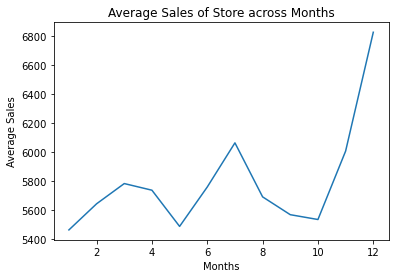

In [8]:
plt.plot(monthly_sales.index.values,monthly_sales)
plt.xlabel('Months')
plt.ylabel('Average Sales')
plt.title('Average Sales of Store across Months')
plt.show()

#### On a daily basis how do the mean of sales vary (across all stores)? again, plot these sales.

In [9]:
#To find mean sales across Days we group by our dataframe on the basis of Days and calculate the mean sales
daily_sales = merged_df.groupby(by='Day')['Sales'].mean()
print(daily_sales)

Day
1     4658.450603
2     6973.664895
3     5811.044109
4     6818.008362
5     6357.150246
6     5886.054621
7     6014.050679
8     5665.783784
9     5253.768165
10    5406.580947
11    5476.275616
12    5203.584321
13    5741.517605
14    5381.010303
15    5831.355980
16    6378.768673
17    6124.261341
18    6370.260326
19    5826.518113
20    5839.835986
21    5454.107989
22    5470.293743
23    5674.454263
24    4975.415350
25    4823.639809
26    4837.208541
27    5801.549321
28    5881.821622
29    5876.384837
30    7297.266656
31    6235.653178
Name: Sales, dtype: float64


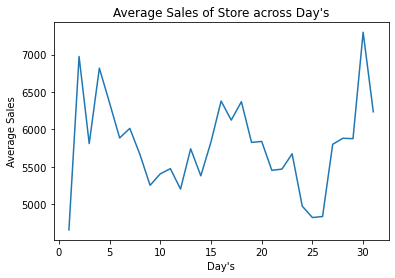

In [10]:
plt.plot(daily_sales.index.values,daily_sales)
plt.xlabel('Day\'s')
plt.ylabel('Average Sales')
plt.title('Average Sales of Store across Day\'s')
plt.show()

#### For the first store id, plot it’s cumulative sales for the first year.

In [11]:
#Filtering our dataframe to include data for Store 1 only and then sort dataframe on Year column
merged_df[merged_df.index == 1].sort_values('Year').head()

,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Day
Store,,,,,,,,,,,,,,,,,,,,
1,2,2013-01-01,0,0,0,0,a,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,1,2013,1
1,6,2013-09-07,4663,555,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9,2013,7
1,5,2013-09-06,3836,466,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9,2013,6
1,4,2013-09-05,3883,465,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9,2013,5
1,3,2013-09-04,3343,444,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0,9,2013,4


In [12]:
#Using the cumsum method to find the cumulative sales for store 1 in year 2013
cumulative_sum = merged_df[(merged_df.index == 1) & (merged_df.Year == 2013)].Sales.cumsum()

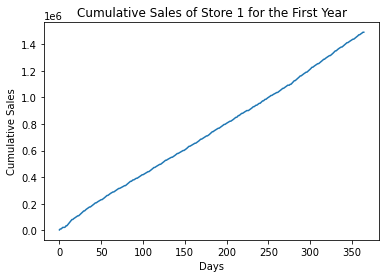

In [13]:
plt.plot(np.arange(365),cumulative_sum)
plt.xlabel('Days')
plt.ylabel('Cumulative Sales')
plt.title('Cumulative Sales of Store 1 for the First Year')
plt.show()

#### Plot and comment on the following relationships:

##### customers(x-axis) vs. sales(y-axis)

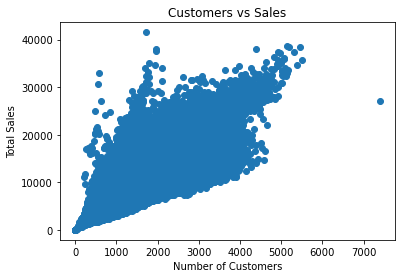

In [14]:
plt.scatter(merged_df.Customers,merged_df.Sales)
plt.xlabel('Number of Customers')
plt.ylabel('Total Sales')
plt.title('Customers vs Sales')
plt.show()

##### competitiondistance(x-axis) vs. sales(y-axis)

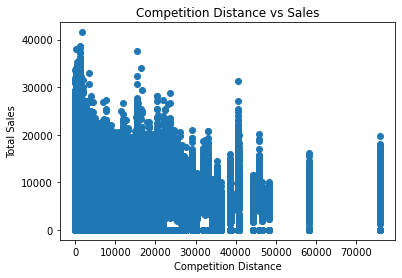

In [15]:
plt.scatter(merged_df.CompetitionDistance,merged_df.Sales)
plt.xlabel('Competition Distance')
plt.ylabel('Total Sales')
plt.title('Competition Distance vs Sales')
plt.show()

#### Plot an array of Pearson correlations between all features. Remember to do the merge operation between the dataframes store and train.

In [16]:
corr_matrix = merged_df.corr(method='pearson')
corr_matrix

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Month,Year,Day
DayOfWeek,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000025,0.000008,0.000007,0.000168,0.000208,0.000168,-0.005362,0.001937,0.005136
Sales,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.018870,-0.012431,0.002749,-0.091040,-0.044143,-0.091056,0.048768,0.023519,-0.011612
Customers,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.102363,-0.015188,0.000489,-0.150159,-0.098323,-0.150138,0.038179,-0.001212,-0.004473
Open,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.007987,-0.000200,-0.001144,-0.008309,-0.007436,-0.008308,-0.000681,-0.001009,0.033428
Promo,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000140,-0.000039,-0.000034,-0.000983,-0.001210,-0.000983,-0.011747,0.024300,-0.108325
SchoolHoliday,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003666,-0.001688,-0.001801,-0.006909,-0.006679,-0.006912,0.103282,-0.036535,0.030538
CompetitionDistance,-0.000025,-0.018870,-0.102363,0.007987,0.000140,-0.003666,1.000000,-0.033191,-0.001363,-0.139228,-0.122925,-0.139291,0.003614,0.000710,0.000049
CompetitionOpenSinceMonth,0.000008,-0.012431,-0.015188,-0.000200,-0.000039,-0.001688,-0.033191,1.000000,0.784968,-0.081027,-0.108546,-0.080952,-0.001037,-0.000203,-0.000012
CompetitionOpenSinceYear,0.000007,0.002749,0.000489,-0.001144,-0.000034,-0.001801,-0.001363,0.784968,1.000000,-0.097433,-0.124378,-0.097363,-0.000897,-0.000176,-0.000011
Promo2,0.000168,-0.091040,-0.150159,-0.008309,-0.000983,-0.006909,-0.139228,-0.081027,-0.097433,1.000000,0.759240,0.999999,-0.025323,-0.004982,-0.000354


<AxesSubplot:>

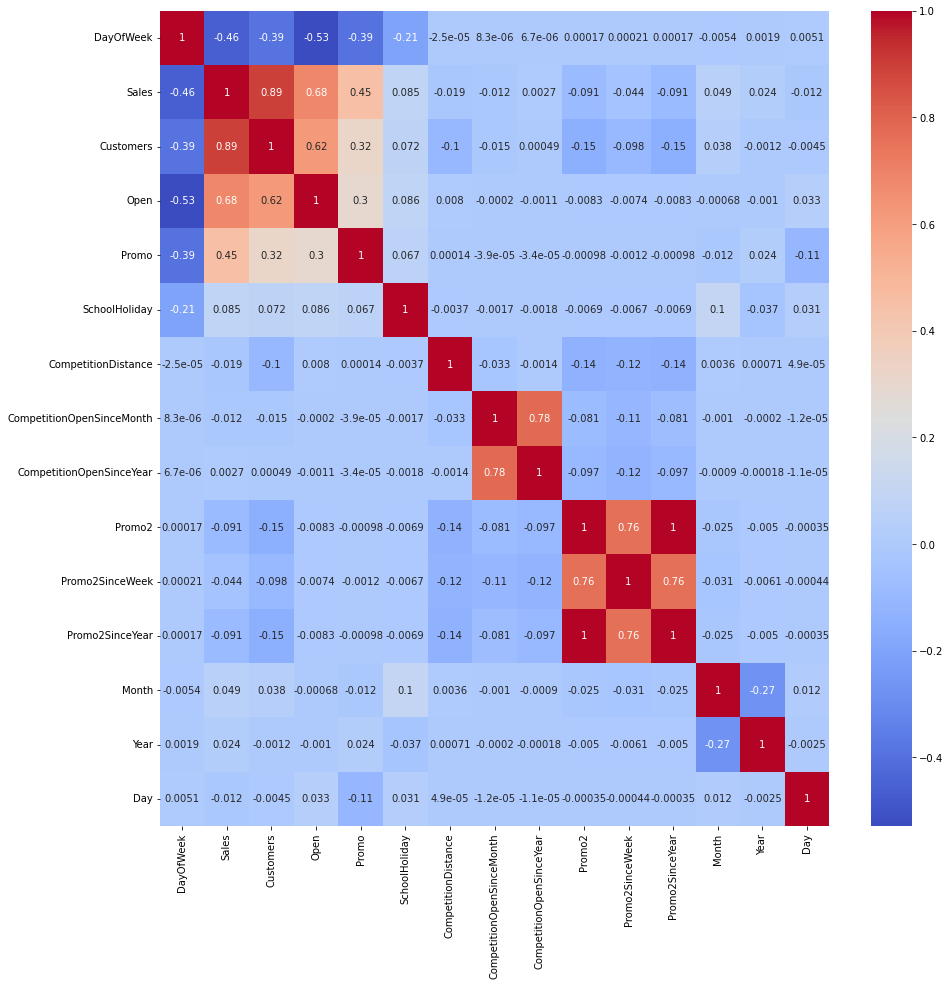

In [17]:
#Plotting our Pearson Correlation matrix as a heat map
import seaborn as sns      #Importing Seaborn
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot = True,cmap= 'coolwarm',ax=ax)

#### For the first 10 stores (id’ed) draw boxplots of their sales

In [18]:
#Filtering our dataframe to include stores whose id is between 1 and 10
first_10_stores = merged_df[(merged_df.index >= 1) & (merged_df.index <= 10)]
#Selecting two columns from dataframe Store and Sales and sorting it with respect to Store Id
first_10_stores = first_10_stores[['Sales']].sort_values(by='Store')
first_10_stores

,Sales
Store,
1,5263
1,0
1,5071
1,4016
1,3795
...,...
10,6124
10,7583
10,0


<AxesSubplot:title={'center':'Sales'}, xlabel='Store'>

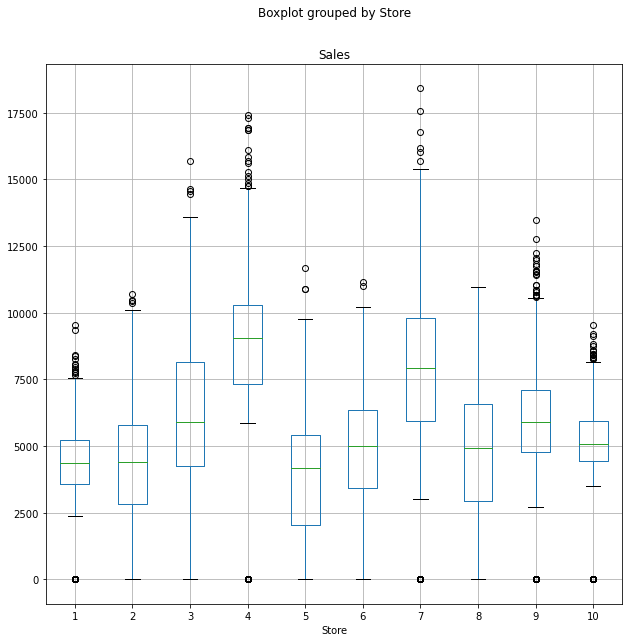

In [19]:
#Plotting the Boxplot on Store and its Sales for first 10 Stores
first_10_stores.boxplot(by='Store',column =['Sales'],figsize=(10,10))

#### From the above plot, which store has the highest median sales?